# CS171 - Spring 2019 - Assignment 1
### Instructor: Vagelis Papalexakis

In this first assignment you will explore a dataset, visualizing the dataset in various ways, and doing a preliminary analysis on the data. 

For this assignment we are going to use the functionality of Pandas (the library, *not* the unbearably cute animal): https://pandas.pydata.org/ in order to manipulate datasets.
In addition to Pandas, we are going to use Matplotlib (https://matplotlib.org/) and Numpy (http://www.numpy.org/) and you may also find Seaborn (https://seaborn.pydata.org/) useful for some data visualization.

Unless you are explicitly asked to *implement* a particular functionality, you may assume that you may use an existing implementation from the libraries above (or some other library that you may find, as long as you *document* it).

Before you start, make sure you have installed all those packages in your local Jupyter instance, as follows:

conda install numpy pandas matplotlib seaborn

## Academic Integrity
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TAs, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources, and if the help is significant, the appropriate grade reduction will be applied. If you fail to do so, the instructor and the TAs are obligated to take the appropriate actions outlined at http://conduct.ucr.edu/policies/academicintegrity.html . Please read carefully the UCR academic integrity policies included in the link.


## Install and Import Packages

In [2]:
!pip3 install --user numpy pandas matplotlib seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand

# for LP Norm function in 2A
from numpy import linalg as LA

## Question 0: Getting real data [0%] 

In this assignment you are going to use data from the UCI Machine Learning repository ( https://archive.ics.uci.edu/ml/index.php ). In particular, you are going to use the famous Iris dataset: https://archive.ics.uci.edu/ml/datasets/Iris


In [4]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Question 1: Data Visualization [20%]


### Question 1a: Scatterplots [10%]
1. Plot the scatterplot of all pairs of features and color the points by class label [5%]
2. Which pair of features is (visually) the most correlated?  [2.5%]
3. Can you think of a reason why looking at this plot would be useful in a task where we would have to classify flowers by label? [2.5%]

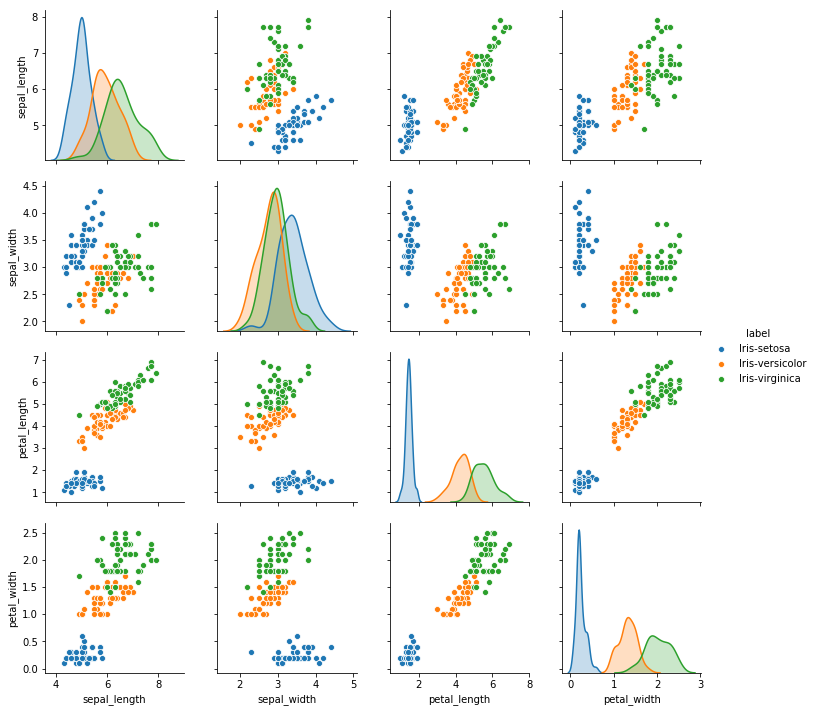

In [5]:
features = sb.pairplot(data, hue="label")

Your answer here:
2. The pair between "petal_length" and "petal_width" is the most correlated because you can draw a line of best fit through the data paints of all 3 species in their scatter plot.
3. It would be useful because we would be able to quickly and visually see the correlations between the data points of each species.

### Question 1b: Boxplot and Histogram [10%]

1. Plot the boxplot for each feature of the dataset (you can put all boxplots on a single figure) [4%]
2. Plot the histogram only for petal length [4%]
3. Does the histogram for petal length give more information than the boxplot? If so, what information? [2%]

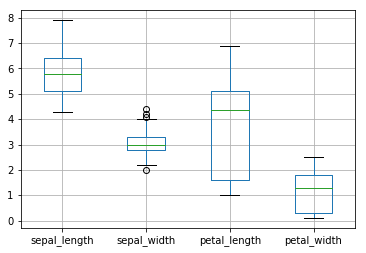

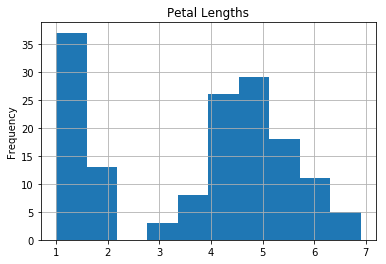

In [6]:
# Create subplot
fig1, plot = plt.subplots()

# Plot boxplot
boxplot = data.boxplot(column=data_names[0:4])
plt.figure()

# Plot histogram
petal_lengths = data["petal_length"]
histogram = petal_lengths.plot(kind="hist", grid=True, title="Petal Lengths")

Your answer here:

3. Yes; the histogram gives us more information than the boxplot because it also tells us the frequency/number of occurrences for each petal length in the data set.

## Question 2: Distance computation [40%]



### Question 2a: Implement the Lp distance function [20%]
1. Write code that implements the Lp distance function between two data points as we saw it in class [15%]
2. Verify that it is correct by comparing it for p=2 against an existing implementation in Numpy for the two selected data points below. Note that the difference of the distances may not be exactly 0 due to numerical precision issues. [5%]

In [7]:
# Calculates the LP norm between 2 points for the p-th order
def LPDistance(a, b, p):
    w1, w2 = a[0], b[0]
    x1, x2 = a[1], b[1]
    y1, y2 = a[2], b[2]
    z1, z2 = a[3], b[3]
    
    return (abs(w1 - w2)**p + abs(x1 - x2)**p + abs(y1 - y2)**p + abs(z1 - z2)**p)**(1/p)

# Get 2 random data points from the iris data set
a = list(data.loc[rand.randint(0, len(data))])[0:4]
b = list(data.loc[rand.randint(0, len(data))])[0:4]

# Verify that the LPDistance function is correct for p=2
print(LA.norm(np.subtract(a, b)), LPDistance(a, b, 2))
if LA.norm(np.subtract(a, b)) == LPDistance(a, b, 2):
    print("Values are equal for p=2")
else:
    print("Values are NOT equal")

0.6782329983125269 0.6782329983125269
Values are equal for p=2


### Question 2b: Compute the distance matrix between all data points [20%]
1. Compute an $N\times N$ distance matrix between all data points (where $N$ is the number of data points) [5%]
2. Plot the above matrix and include a colorbar. [5%]
3. What is the minimum number of distance computations that you can do in order to populate every value of this matrix? (note: it is OK if in the first two questions you do all the $N^2$ computations) [5%]
4. Note that the data points in your dataset are sorted by class. What do you observe in the distance matrix? [5%]

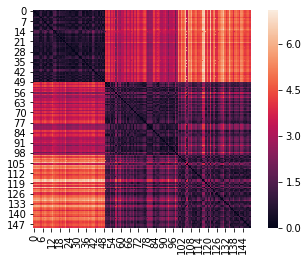

In [8]:
# Initialize an N x N matrix
n = len(data)
matrix = np.zeros((n, n))

# Populate matrix with distance calculations
for i in range(len(matrix)):
    for j in range(len(matrix)):
        p1 = list(data.loc[i])[0:4]
        p2 = list(data.loc[j])[0:4]
        
        distance = LPDistance(p1, p2, 2)
        matrix[i][j] = distance

# Display matrix in a heatmap with colorbar
hm = sb.heatmap(matrix, square=True)

Your answer here:
3. The minimum number of distance computations you can do is (N x N) / 2 computations because the values on bottom-left triangle of the matrix has the same values as the values top-right of the matrix.
4. From the heatmap generated by the distance matrix, we can observe that the distances are separated into squares, representing separate classes. In addition, the lower-left triangle is equivalent to the upper-right triangle, as mentioned in 2b3.

## Question 3: Data Sampling [40%]

Sometimes datasets are too big, or come in a streaming fashion, and it is impossible for us to process every single data point, so we have to resort to sampling methods. In this question, you will implement the popular "reservoir sampling" method, which is mostly used to obtain a uniform random sample of a data stream. Subsequently, you will experiment with sampling directly all the data and conducting stratified sampling (by class label) and observe the results in the data distribution.

### Question 3a: Reservoir Sampling [20%]
1. Implement reservoir sampling as we saw it in class. Create a 'reservoir_sampling' function because it will be useful for the next question. [15%]
2. Run reservoir sampling with reservoir size $M = 15$ and plot the histogram of the petal length feature for the sampled dataset [5%]

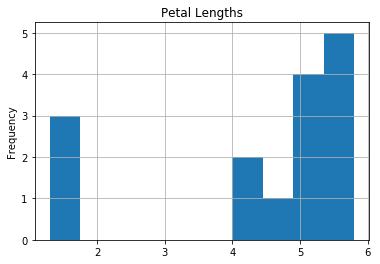

In [9]:
def reservoir_sampling(stream, M):
    reservoir = [None] * M
    
    # Fill the reservoir with M items from the stream
    for i in range(M):
        item = stream.loc[i]
        reservoir[i] = item
    
    for i in range(M, len(stream)):
        item = stream.loc[i]
        
        j = rand.randint(0, i)
        if j < M:
            reservoir[j] = stream.loc[i]
    
    return pd.DataFrame(reservoir)

# Plot histogram from reservoir sampling using M = 15
res_sample = reservoir_sampling(data, 15)
res_petal_lengths = res_sample["petal_length"]
res_histogram = res_petal_lengths.plot(kind="hist", grid=True, title="Petal Lengths")

### Question 3b: Stratified Sampling [20%]
1. Implement stratified sampling by class label, and within each stratum use the reservoir sampling function you implemented. [15%]
2. Run your stratified sampler with $M=5$ samples per class (so that we have 15 data points in total) and plot the histogram of the petal length feature for the sampled dataset [2.5%]
3. Do you observe any difference between the stratified and the non-stratified histograms? Which one resembles the original petal length distribution more closely? In order to answer this question you may want to run both sampling procedures a few times and observe which one gives a more accurate result on average. [2.5%]

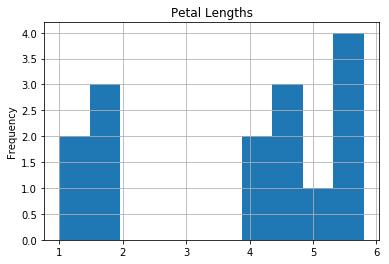

In [10]:
def stratified_sampling(stream, M):
    # Separate into 3 classes (setosa, versicolor, and virginica)
    # Use reservoir sampling for each class using M = 5
    # Combine 3 separate samples
    # Return combined sample
    setosas, versicolors, virginicas = [], [], []
    
    # Separate data from stream into 3 lists
    for i in range(len(stream)):
        item = stream.loc[i]
        class_label = item["label"]
        
        if class_label == "Iris-setosa":
            setosas.append(item)
        elif class_label == "Iris-versicolor":
            versicolors.append(item)
        else:
            virginicas.append(item)
    
    # Convert to data frames and reset indices
    df_setosas = pd.DataFrame(setosas).reset_index(drop=True)
    df_versicolors = pd.DataFrame(versicolors).reset_index(drop=True)
    df_virginicas = pd.DataFrame(virginicas).reset_index(drop=True)
    
    # Perform reservoir sampling on each class
    res_setosas = reservoir_sampling(df_setosas, M)
    res_versicolors = reservoir_sampling(df_versicolors, M)
    res_virginicas = reservoir_sampling(df_virginicas, M)
    
    # Merge all 3 classes
    strata = pd.concat([res_setosas, res_versicolors, res_virginicas]).reset_index(drop=True)
    
    return strata

strat_sample = stratified_sampling(data, 5)
strat_petal_lengths = strat_sample["petal_length"]
strat_histogram = strat_petal_lengths.plot(kind="hist", grid=True, title="Petal Lengths")

Your answer here:
3. Both plots generated by reservoir and stratified sampling look very similar. However, the plot generated from the stratified sampling resembles the original histogram more closely after running both algorithms multiple times. This makes sense because in the stratified sampling method, we are guaranteed to extract samples from each of the 3 classes. However, in reservoir sampling, there is a possibility that the distribution from sampling between the classes is uneven.